In [1]:
# This script compares performance against the market index. 
# Updated by: Kuo L. 2022-05-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pands-datareader module to connect to  yahoo finance api 
# to get close price for each ticker stock/ETF.
# for Market Index: NASDAQ Composite (^IXIC), 
#                   S&P 500 (^GSPC), 
#                   Dow Jones Industrial Average (^DJI)
#                   Russell 2000 (^RUT)

market_inx = '^GSPC' # ^GSPC for S&P 500
assets = [market_inx, 'AAPL','AMZN','GOOGL', 'DVN']
start_date = '2020-1-1'
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start_date)['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2020-01-02,3257.850098,73.785919,94.900497,1368.680054,22.485584
2020-01-03,3234.850098,73.068565,93.748497,1361.520020,22.755865
2020-01-06,3246.280029,73.650787,95.143997,1397.810059,23.026148
2020-01-07,3237.179932,73.304420,95.343002,1395.109985,23.095894
2020-01-08,3253.050049,74.483589,94.598503,1405.040039,22.276337


In [4]:
pf_data.tail() #check companies still open and public at ending date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2022-06-01,4101.229980,148.710007,121.683998,2277.840088,76.480003
2022-06-02,4176.819824,151.210007,125.511002,2352.449951,76.309998
2022-06-03,4108.540039,145.380005,122.349998,2290.820068,77.019997
2022-06-06,4121.430176,146.139999,124.790001,2336.409912,77.050003
2022-06-07,4160.680176,148.710007,123.000000,2342.989990,78.040001


<AxesSubplot:xlabel='Date'>

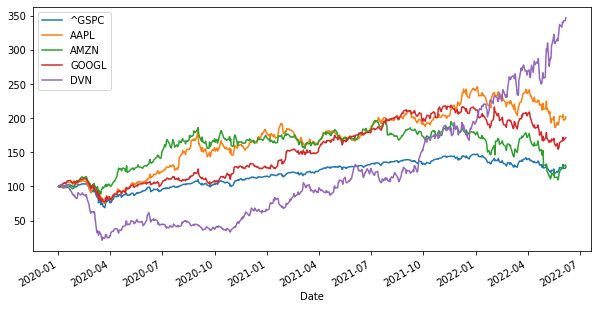

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

^GSPC    0.099923
AAPL     0.286287
AMZN     0.105946
GOOGL    0.219600
DVN      0.508312
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,0.066451,0.077740,0.058529,0.069398,0.104430
AAPL,0.077740,0.136784,0.088426,0.088052,0.091193
AMZN,0.058529,0.088426,0.134622,0.079171,0.055502
GOOGL,0.069398,0.088052,0.079171,0.109513,0.098719
DVN,0.104430,0.091193,0.055502,0.098719,0.564777


In [9]:
log_returns.corr() #get correlation between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,1.000000,0.815404,0.618815,0.813509,0.539055
AAPL,0.815404,1.000000,0.651632,0.719426,0.328099
AMZN,0.618815,0.651632,1.000000,0.652038,0.201286
GOOGL,0.813509,0.719426,0.652038,1.000000,0.396944
DVN,0.539055,0.328099,0.201286,0.396944,1.000000


***